In [ ]:
%pip install  -q --upgrade pip

In [ ]:
'''
Author : Arewa Morountudun Ojelade
Date : 11/11/2025
Course: DATA 645 Machine Learning
Assignment: Logistic Regression Draft 1
Academia: University of Maryland Global Campus
'''
%pip install -q pandas matplotlib numpy seaborn tensorflow plotly sklearn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import statsmodels.api as sm
from ISLP import confusion_table
from ISLP. models import (contrast, summarize, ModelSpec as MS)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.layers import Normalization
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
df_h = pd.read_csv('SAheart.csv')
df_w = pd.read_csv('whas500.csv')
df_w.head()

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,...,1,0,1,1/13/1997,1/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,...,0,1,1,1/19/1997,1/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,...,0,1,1,1/1/1997,1/6/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,2/17/1997,2/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,...,0,1,1,3/1/1997,3/7/1997,12/31/2002,6,0,2131,0


In [3]:
# df_w['fdate'] = pd.to_datetime(df_w['fdate'])
# df_w['admitdate'] = pd.to_datetime(df_w['admitdate'])
# df_w['follow_up_duration'] = abs((df_w['fdate'] - df_w['admitdate']).dt.days)
df_w.drop(columns=['fdate', 'admitdate', 'disdate'], inplace=True)
df_w.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      500 non-null    int64  
 1   age     500 non-null    int64  
 2   gender  500 non-null    int64  
 3   hr      500 non-null    int64  
 4   sysbp   500 non-null    int64  
 5   diasbp  500 non-null    int64  
 6   bmi     500 non-null    float64
 7   cvd     500 non-null    int64  
 8   afb     500 non-null    int64  
 9   sho     500 non-null    int64  
 10  chf     500 non-null    int64  
 11  av3     500 non-null    int64  
 12  miord   500 non-null    int64  
 13  mitype  500 non-null    int64  
 14  year    500 non-null    int64  
 15  los     500 non-null    int64  
 16  dstat   500 non-null    int64  
 17  lenfol  500 non-null    int64  
 18  fstat   500 non-null    int64  
dtypes: float64(1), int64(18)
memory usage: 74.3 KB


In [4]:
df_h.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [6]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      500 non-null    int64  
 1   age     500 non-null    int64  
 2   gender  500 non-null    int64  
 3   hr      500 non-null    int64  
 4   sysbp   500 non-null    int64  
 5   diasbp  500 non-null    int64  
 6   bmi     500 non-null    float64
 7   cvd     500 non-null    int64  
 8   afb     500 non-null    int64  
 9   sho     500 non-null    int64  
 10  chf     500 non-null    int64  
 11  av3     500 non-null    int64  
 12  miord   500 non-null    int64  
 13  mitype  500 non-null    int64  
 14  year    500 non-null    int64  
 15  los     500 non-null    int64  
 16  dstat   500 non-null    int64  
 17  lenfol  500 non-null    int64  
 18  fstat   500 non-null    int64  
dtypes: float64(1), int64(18)
memory usage: 74.3 KB


In [7]:
df = df_h.copy()
#df['famhist'] = df['famhist'].map({'Absent':0, 'Present':1})
df['famhist'] = df.astype({'famhist':'category'})['famhist'].cat.codes
df['famhist'].value_counts()

famhist
0    270
1    192
Name: count, dtype: int64

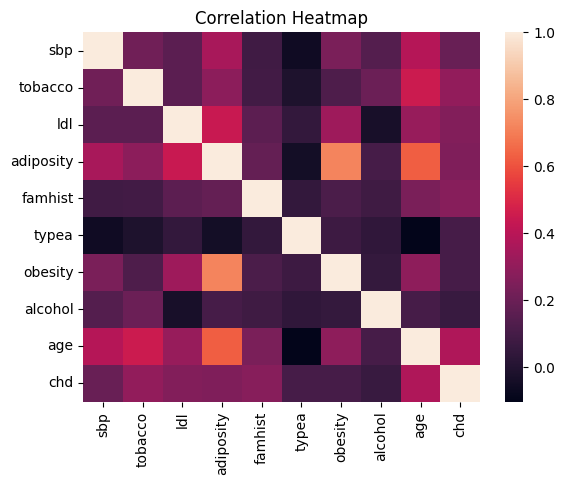

In [8]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

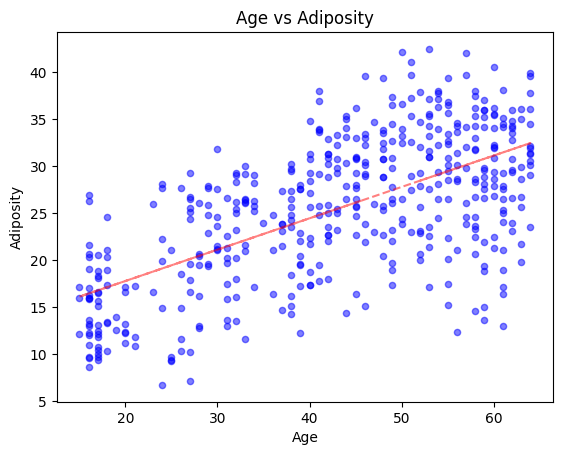

In [9]:
m, b = np.polyfit(df['age'], df['adiposity'], 1)
y_fit = m*df['age'] + b
df.plot.scatter(x='age', y='adiposity', alpha=0.5, color='blue',
                title='Age vs Adiposity', xlabel='Age', ylabel='Adiposity')
plt.plot(df['age'], y_fit, linestyle='--', label='Trend Line', \
    color = 'red', alpha=0.5)

<Axes: title={'center': 'Adiposity Distribution'}, xlabel='Adiposity', ylabel='Frequency'>

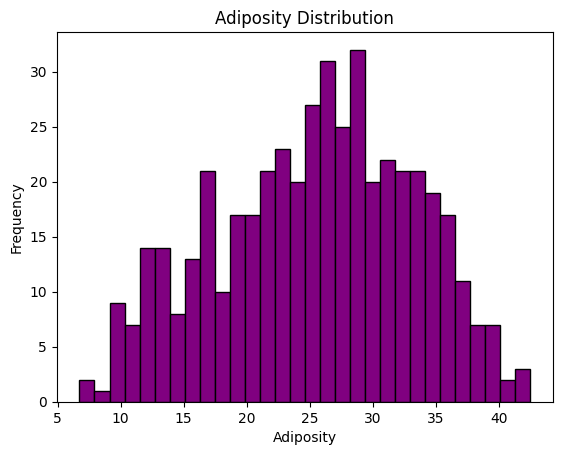

In [10]:
df['adiposity'].plot(kind='hist', bins=30, title='Adiposity Distribution',
                 xlabel='Adiposity', ylabel='Frequency', edgecolor='black',
                 color='purple')

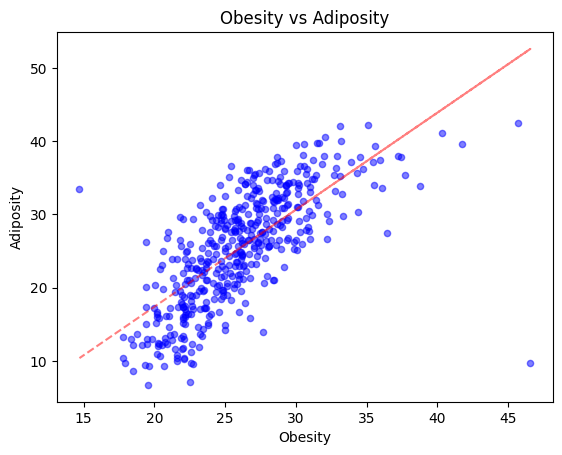

In [11]:
m, b = np.polyfit(df['obesity'], df['adiposity'], 1)
y_fit = m*df['obesity'] + b
df.plot.scatter(x='obesity', y='adiposity', alpha=0.5, color='blue',
                title='Obesity vs Adiposity', xlabel='Obesity', ylabel='Adiposity')
plt.plot(df['obesity'], y_fit, linestyle='--', label='Trend Line', \
    color = 'red', alpha=0.5)

<Axes: title={'center': 'Obesity Distribution'}, xlabel='Obesity', ylabel='Frequency'>

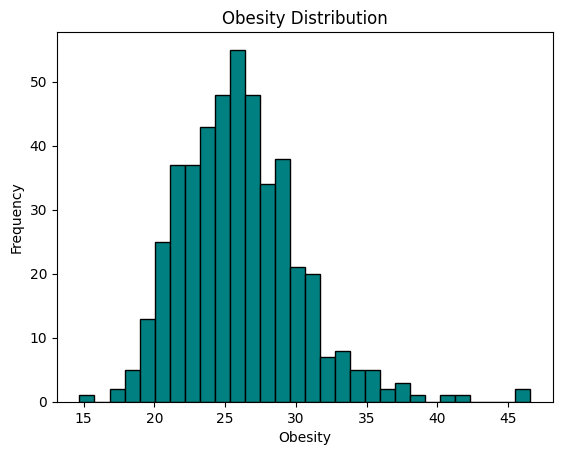

In [12]:
df['obesity'].plot(kind='hist', bins=30, title='Obesity Distribution',
                 xlabel='Obesity', ylabel='Frequency', edgecolor='black',
                 color='teal')

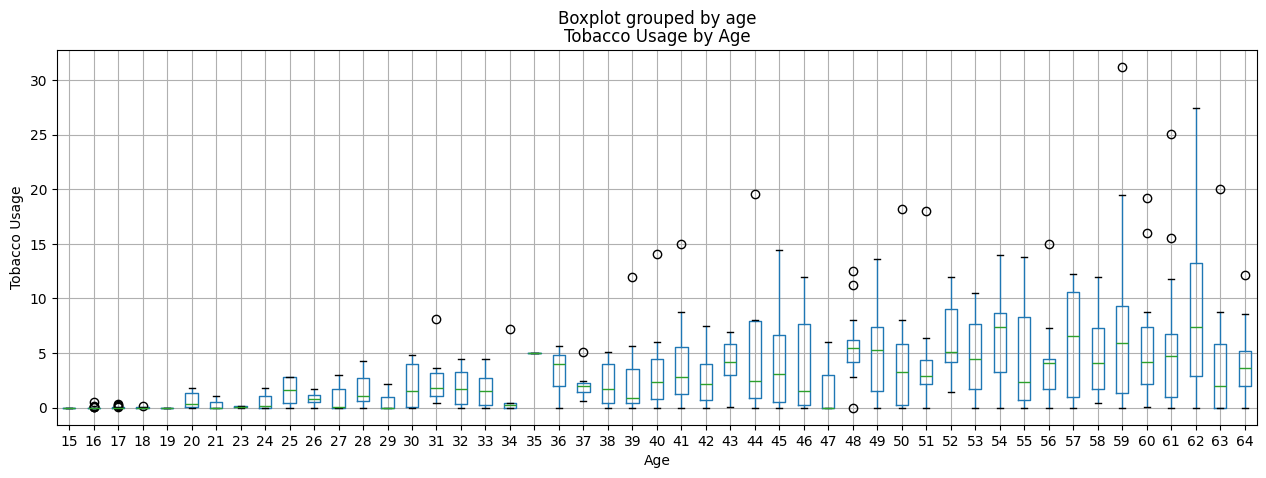

In [13]:
df.boxplot(column='tobacco', by = "age", figsize=(15, 5))
plt.title('Tobacco Usage by Age',)
plt.xlabel('Age')
plt.ylabel('Tobacco Usage')
plt.show()


In [14]:
# Adiposity to Obesity value ratio
#df['adiposity_obesity_ratio'] = df['adiposity'] / df['obesity']
df['adiposity_obesity_ratio'] = df['adiposity'] + df['obesity']/ max(df['adiposity'].max(), df['obesity'].max())

df[['adiposity', 'obesity', 'adiposity_obesity_ratio']].head()


,adiposity,obesity,adiposity_obesity_ratio
0,23.11,25.30,23.653152
1,28.61,28.87,29.229794
2,32.28,29.14,32.905590
3,38.03,31.99,38.716775
4,27.78,25.99,28.337965


In [15]:
allvars = df.columns.drop(['chd'])
design = MS(allvars)
X = design.fit_transform(df)
y = df['chd']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-7.8242,3.376,-2.318,0.020
sbp,0.0024,0.014,0.165,0.869
tobacco,0.2007,0.076,2.628,0.009
ldl,0.2940,0.182,1.618,0.106
adiposity,-0.0353,0.042,-0.840,0.401
famhist,1.5255,0.565,2.698,0.007
typea,0.0186,0.031,0.609,0.543
obesity,0.1064,0.133,0.800,0.424
alcohol,-0.0077,0.009,-0.859,0.390
age,0.0511,0.033,1.546,0.122


In [ ]:
print("#"*20, "South Africa Men's Heart Disease Dataset", "#"*20)
print("#"*10, "Congenital Heard Disease Prediction Report", "#"*10)
probabilities = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probabilities]

print(classification_report(y_test, y_pred))

#################### South Africa Men's Heart Disease Dataset ####################
########## Congenital Heard Disease Prediction Report ##########
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       243
           1       0.56      0.60      0.58       126

    accuracy                           0.70       369
   macro avg       0.67      0.68      0.68       369
weighted avg       0.71      0.70      0.71       369



In [17]:
allvars = df.columns.drop(['chd', 'alcohol', 'sbp', 'adiposity_obesity_ratio', 'adiposity'])
design = MS(allvars)
X = design.fit_transform(df)
y = df['chd']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-6.6722,2.526,-2.642,0.008
tobacco,0.1738,0.067,2.579,0.010
ldl,0.2290,0.153,1.494,0.135
famhist,1.4520,0.547,2.656,0.008
typea,0.0252,0.029,0.874,0.382
obesity,0.0273,0.080,0.341,0.733
age,0.0352,0.027,1.307,0.191


In [18]:
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Discharge Status Prediction Report", "#"*10)
probabilities = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probabilities]

print(classification_report(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Discharge Status Prediction Report ##########
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       243
           1       0.59      0.60      0.59       126

    accuracy                           0.72       369
   macro avg       0.69      0.69      0.69       369
weighted avg       0.72      0.72      0.72       369



In [19]:
allvars = df_w.columns.drop(['dstat', 'fstat', 'cvd', 'afb', 'sho', 'chf',
                             'av3', 'gender', 'id', 'year', 'lenfol', 'miord', 'mitype'])
design = MS(allvars)
X = design.fit_transform(df_w)
y = df_w['dstat']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,6.0042,7.336,0.818,0.413
age,0.0154,0.048,0.318,0.750
hr,0.0357,0.025,1.430,0.153
sysbp,-0.0338,0.024,-1.391,0.164
diasbp,0.0020,0.039,0.051,0.959
bmi,-0.3082,0.229,-1.346,0.178
los,-0.4031,0.286,-1.409,0.159


In [20]:
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Discharge Status Prediction Report", "#"*10)
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Discharge Status Prediction Report ##########
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       365
           1       0.56      0.14      0.23        35

    accuracy                           0.92       400
   macro avg       0.74      0.57      0.59       400
weighted avg       0.89      0.92      0.89       400



In [21]:
allvars = df_w.columns.drop(['dstat', 'fstat', 'cvd', 'afb', 'sho', 'chf',
                             'av3', 'gender', 'id', 'year', 'lenfol', 'miord', 'mitype', 'los'])
design = MS(allvars)
X = design.fit_transform(df_w)
y = df_w['sho']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Cardiogenic Shock Prediction Report", "#"*10)
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))


#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Cardiogenic Shock Prediction Report ##########
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       381
           1       0.20      0.16      0.18        19

    accuracy                           0.93       400
   macro avg       0.58      0.56      0.57       400
weighted avg       0.92      0.93      0.93       400



In [22]:
y = df_w['chf']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Congestive Heart Complications Prediction Report", "#"*10)
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Congestive Heart Complications Prediction Report ##########
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       277
           1       0.56      0.28      0.38       123

    accuracy                           0.71       400
   macro avg       0.65      0.59      0.59       400
weighted avg       0.68      0.71      0.68       400



In [23]:
allvars = df_w.columns.drop(['dstat', 'fstat', 'cvd', 'afb', 'sho', 'chf',
                             'av3', 'gender', 'id', 'year', 'lenfol', 'miord', 'mitype', 'los'])
design = MS(allvars)
X = design.fit_transform(df_w)
y = df_w['av3']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Complete Heart Block Prediction Report", "#"*10)
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Complete Heart Block Prediction Report ##########
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       390
           1       0.11      0.10      0.11        10

    accuracy                           0.96       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.96      0.96      0.96       400



C:\Users\arewa\AppData\Roaming\Python\Python313\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\arewa\AppData\Roaming\Python\Python313\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\arewa\AppData\Roaming\Python\Python313\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\arewa\AppData\Roaming\Python\Python313\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
